TASK-1: LINEAR REGRESSION WITH PYTHON

BY EKTA DAGAR

In [1]:
import pandas as pd  
import numpy as np    
import matplotlib.pyplot as plt 

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data1 = pd.read_csv(url)
print("Imported Data")

data1.head(15)

Imported Data


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data1.shape

(25, 2)

In [4]:
data1.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


VISUALIZATION

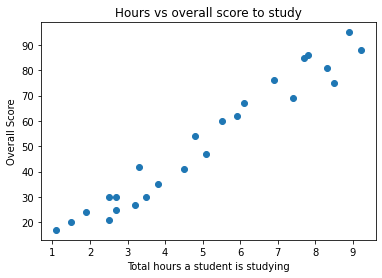

In [5]:
#data_load.plot(x='Hours', y='Score', style='o')
plt.scatter(data1['Hours'], data1['Scores'])
plt.title('Hours vs overall score to study')    
plt.xlabel('Total hours a student is studying')    
plt.ylabel('Overall Score')    
plt.show() 

# splitting the data into training and testing set

# dividing the data into attributes and labels 

In [6]:
#X will take all the values except for the last column which is our dependent variable (target variable)
X = data1.iloc[:, :-1].values
y = data1.iloc[:, -1].values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Training the Linear Regression Model

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

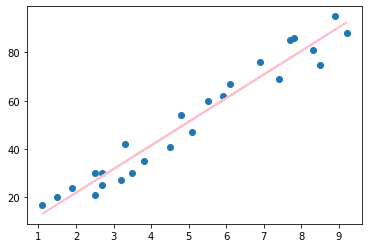

In [9]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color = 'pink');
plt.show()

In [10]:
#Predicting the Test set results
y_pred = regressor.predict(X_test)
print(y_pred)

[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


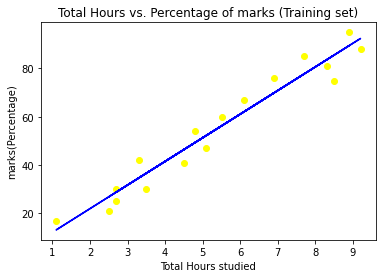

In [17]:
#Visualising the Training set results
plt.scatter(X_train, y_train, color = 'yellow')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Total Hours vs. Percentage of marks (Training set)')
plt.xlabel('Total Hours studied')
plt.ylabel('marks(Percentage)')
plt.show()

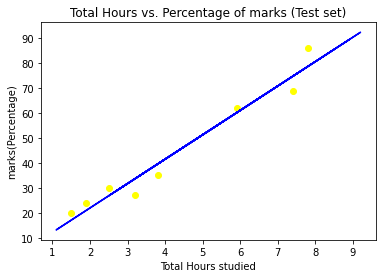

In [19]:
#Visualising the Test set results
plt.scatter(X_test, y_test, color = 'yellow')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Total Hours vs. Percentage of marks (Test set)')
plt.xlabel('Total Hours studied')
plt.ylabel('marks(Percentage)')
plt.show()

In [20]:
#Comparing the actual values with the predicted ones.
data2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
data2

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [23]:
#predicting the score 
data2 = np.array(9.25)
data2 = data2.reshape(-1, 1)
pred = regressor.predict(data2)
print("If the student studies for 9.25 hours/day, the score is {}.".format(pred))

If the student studies for 9.25 hours/day, the score is [92.91505723].


Error Calculation

In [24]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.419727808027652


In [25]:
from sklearn.metrics import r2_score
print("The R-Square of the model is: ",r2_score(y_test,y_pred))

The R-Square of the model is:  0.9568211104435257


Conclusion:
We used a Linear Regression Model to predict the score of a student if he/she studies for 9.25 hours/day and the Predicted 
Score came out to be 92.91.